In [2]:
import pandas as pd

nodes_df = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\FoodwebNodelist.csv")
edges_df = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\FoodwebEdgelist.csv")

print(nodes_df.head())
print(edges_df.head())

                          Id  Label   kingdom    phylum     class      order  \
0              Canis latrans    NaN  Animalia  Chordata  Mammalia  Carnivora   
1  Ammospermophilus leucurus    NaN  Animalia  Chordata  Mammalia   Rodentia   
2            Vulpes macrotis    NaN  Animalia  Chordata  Mammalia  Carnivora   
3        Bassariscus astutus    NaN  Animalia  Chordata  Mammalia  Carnivora   
4                 Lynx rufus    NaN  Animalia  Chordata  Mammalia  Carnivora   

        family             genus                    species   category  \
0      Canidae             Canis              Canis latrans  vert.endo   
1    Sciuridae  Ammospermophilus  Ammospermophilus leucurus  vert.endo   
2      Canidae            Vulpes            Vulpes macrotis  vert.endo   
3  Procyonidae       Bassariscus        Bassariscus astutus  vert.endo   
4      Felidae              Lynx                 Lynx rufus  vert.endo   

    taxon                  aggregate  
0  Mammal              Canis latran

In [3]:
import networkx as nx

# Create an undirected graph from the edge list DataFrame
G = nx.from_pandas_edgelist(edges_df, source='Source', target='Target')

print(G)

Graph with 300 nodes and 4059 edges


In [4]:
# Calculate the global clustering coefficient (transitivity) of the graph
clustering_coeff = nx.transitivity(G)
print(f"Global clustering coefficient: {clustering_coeff:.4f}")

Global clustering coefficient: 0.1394


In [6]:
n = G.number_of_nodes()
m = G.number_of_edges()

er_transitivities = []
for _ in range(100):
    er = nx.gnm_random_graph(n, m)
    trans = nx.transitivity(er)
    er_transitivities.append(trans)

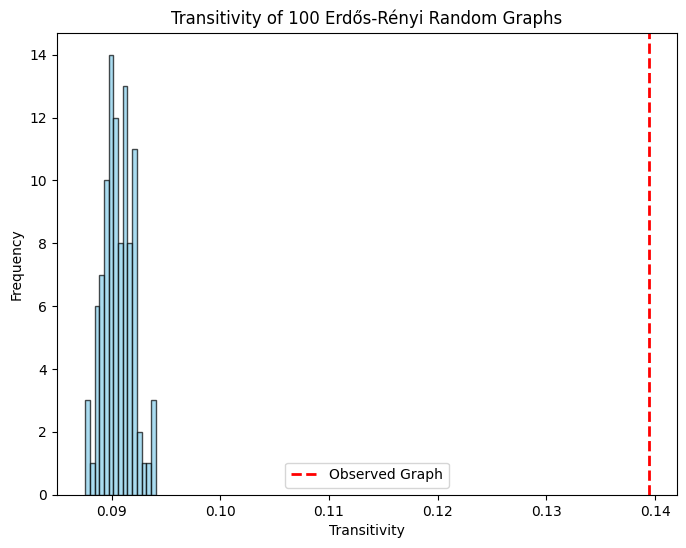

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(er_transitivities, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(clustering_coeff, color='red', linestyle='dashed', linewidth=2, label='Observed Graph')
plt.xlabel('Transitivity')
plt.ylabel('Frequency')
plt.title('Transitivity of 100 Erdős-Rényi Random Graphs')
plt.legend()
plt.show()

In [8]:
# Load the edge-weighted graph
G_brain = nx.read_weighted_edgelist("C:\\Users\\YuxinLi\\Downloads\\brain_network.txt")

# Create a list of the degrees of all nodes
degrees = [deg for node, deg in G_brain.degree()]
print("Degrees of all nodes:", degrees)

# Calculate and print the unweighted global clustering coefficient
clustering_coeff = nx.transitivity(G_brain)
print(f"Unweighted global clustering coefficient: {clustering_coeff:.4f}")

Degrees of all nodes: [13, 19, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 22, 9, 2, 2, 2, 2, 2, 2, 2, 2, 35, 16, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Unweighted global clustering coefficient: 0.2114


In [9]:
# Generate 100 configuration model graphs and calculate their clustering coefficients
config_clustering = []

for _ in range(100):
    # Create configuration model
    config = nx.configuration_model(degrees)
    # Convert to simple graph (remove parallel edges and self-loops)
    simple_config = nx.Graph(config)
    simple_config.remove_edges_from(nx.selfloop_edges(simple_config))
    # Calculate global clustering coefficient
    coeff = nx.transitivity(simple_config)
    config_clustering.append(coeff)

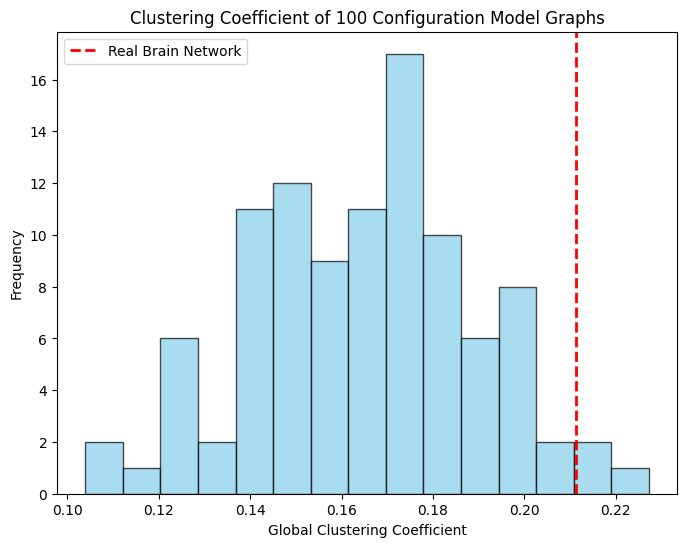

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(config_clustering, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(clustering_coeff, color='red', linestyle='dashed', linewidth=2, label='Real Brain Network')
plt.xlabel('Global Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient of 100 Configuration Model Graphs')
plt.legend()
plt.show()

In [11]:
import numpy as np

# Calculate the sum of weights (strength) for each node
strength = dict(G_brain.degree(weight='weight'))

# Calculate the total strength of the graph (sum of all edge weights)
total_strength = sum(strength.values())

# Get the list of nodes and create an index mapping
nodes = list(G_brain.nodes())
node_index = {node: i for i, node in enumerate(nodes)}

# Create an empty matrix to store the J-values
J = np.zeros((len(nodes), len(nodes)))

# Nested loop through every possible pair of nodes
for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
        # Get the actual edge weight (0 if no edge exists)
        actual_weight = G_brain[u][v]['weight'] if G_brain.has_edge(u, v) else 0.0
        # Calculate the expected weight
        expected_weight = (strength[u] * strength[v]) / (2.0 * total_strength)
        # Compute J-value
        J[i, j] = actual_weight - expected_weight

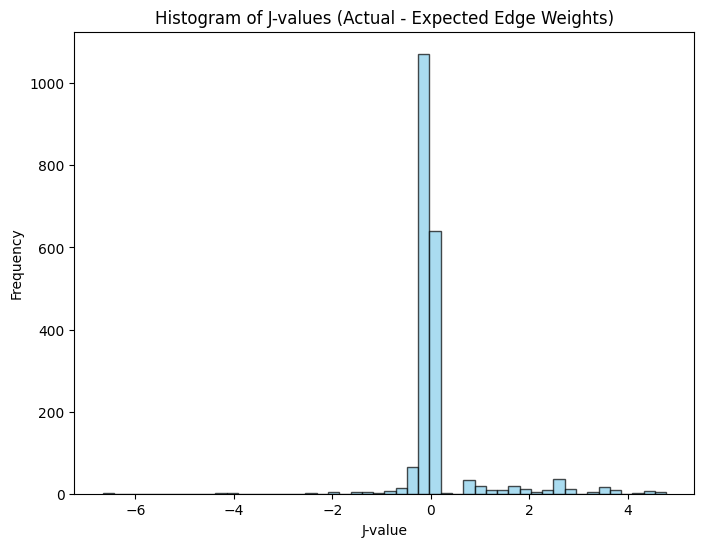

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(J.flatten(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('J-value')
plt.ylabel('Frequency')
plt.title('Histogram of J-values (Actual - Expected Edge Weights)')
plt.show()

In [13]:
# 1. Erdős-Rényi random graph
G_random = nx.erdos_renyi_graph(1000, 0.01)

# 2. Community-based graph (stochastic block model)
sizes = [200] * 5  # 5 communities of 200 nodes each
p_in = 0.0480      # Probability within communities
p_out = 0.000548   # Probability between communities

# Create the probability matrix
probs = [[p_in if i == j else p_out for j in range(5)] for i in range(5)]

G_community = nx.stochastic_block_model(sizes, probs)

# Print number of nodes and edges for both graphs
print(f"G_random: {G_random.number_of_nodes()} nodes, {G_random.number_of_edges()} edges")
print(f"G_community: {G_community.number_of_nodes()} nodes, {G_community.number_of_edges()} edges")

G_random: 1000 nodes, 4974 edges
G_community: 1000 nodes, 4944 edges


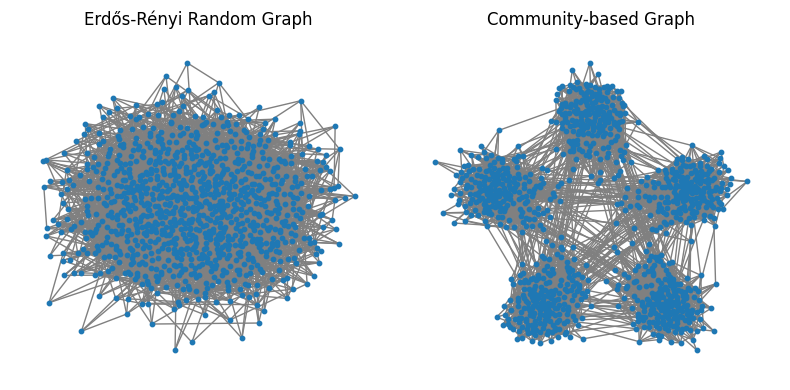

In [14]:
# Visualize the Erdős-Rényi random graph
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
pos_random = nx.spring_layout(G_random, seed=42)
nx.draw(G_random, pos_random, node_size=10, edge_color='gray')
plt.title("Erdős-Rényi Random Graph")

# Visualize the community-based graph
plt.subplot(1, 2, 2)
pos_community = nx.spring_layout(G_community, seed=42)
nx.draw(G_community, pos_community, node_size=10, edge_color='gray')
plt.title("Community-based Graph")

plt.tight_layout()
plt.show()

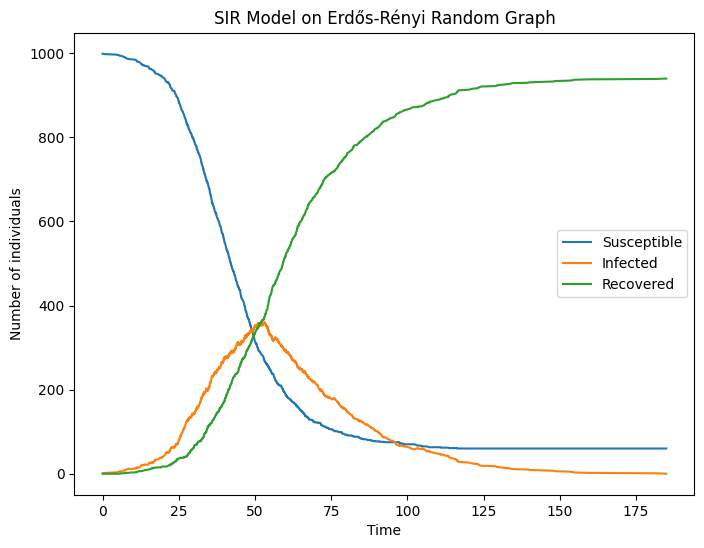

In [16]:
import EoN

# Set parameters
tau = 0.02
gamma = 0.05
initial_infecteds = [0]

# Run the fast_SIR simulation
t, S, I, R = EoN.fast_SIR(G_random, tau, gamma, initial_infecteds=initial_infecteds, tmax=200)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Model on Erdős-Rényi Random Graph')
plt.legend()
plt.show()

In [17]:
beta = 0.05
gamma = 0.1
initial_infecteds = [0]
n_sim = 100

# Store (peak_time, peak_height) for each simulation
random_peaks = []
community_peaks = []

for _ in range(n_sim):
    t, S, I, R = EoN.fast_SIR(G_random, beta, gamma, initial_infecteds=initial_infecteds, tmax=200)
    peak_idx = np.argmax(I)
    random_peaks.append((t[peak_idx], I[peak_idx]))

for _ in range(n_sim):
    t, S, I, R = EoN.fast_SIR(G_community, beta, gamma, initial_infecteds=initial_infecteds, tmax=200)
    peak_idx = np.argmax(I)
    community_peaks.append((t[peak_idx], I[peak_idx]))

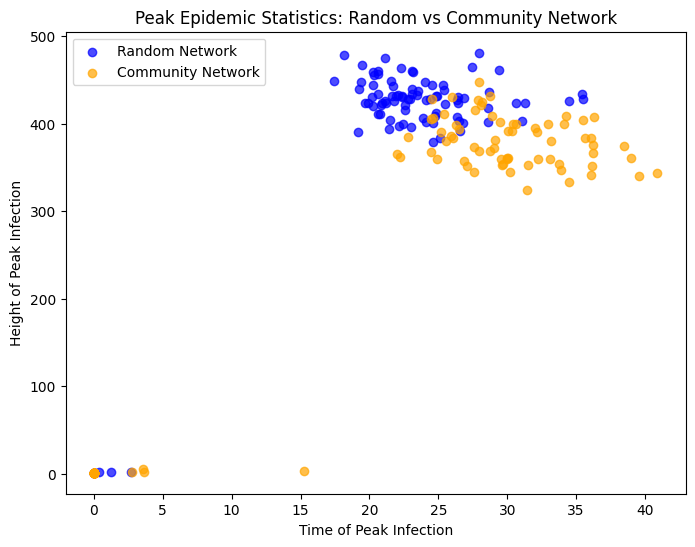

In [18]:
# Unpack peak times and heights
random_peak_times, random_peak_heights = zip(*random_peaks)
community_peak_times, community_peak_heights = zip(*community_peaks)

plt.figure(figsize=(8, 6))
plt.scatter(random_peak_times, random_peak_heights, alpha=0.7, label='Random Network', color='blue')
plt.scatter(community_peak_times, community_peak_heights, alpha=0.7, label='Community Network', color='orange')
plt.xlabel('Time of Peak Infection')
plt.ylabel('Height of Peak Infection')
plt.title('Peak Epidemic Statistics: Random vs Community Network')
plt.legend()
plt.show()